In [1]:
import pandas as pd
import networkx as nx

In [2]:
bipartite_df = pd.read_csv('../data/processed/bipartite-network-edges.csv')
bipartite_graph = nx.from_pandas_edgelist(bipartite_df, 'source', 'target')

In [3]:
# Analyze the bipartite graph
print(f"Number of nodes: {bipartite_graph.number_of_nodes()}")
print(f"Number of edges: {bipartite_graph.number_of_edges()}")

# Connected components
connected_components = list(nx.connected_components(bipartite_graph))
print(f"Number of connected components: {len(connected_components)}")

# Degree distribution
degrees = sorted((d for n, d in bipartite_graph.degree()), reverse=True)
degree_series = pd.Series(degrees)
print("Degree distribution statistics:")
print(degree_series.describe())

print(f"Top 5 nodes by degree: {degrees[:5]}")

print(f"Top 5 nodes with lowest degree: {degrees[-5:]}")

Number of nodes: 5585
Number of edges: 45032
Number of connected components: 2
Degree distribution statistics:
count    5585.000000
mean       16.126052
std       110.254238
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max      3238.000000
dtype: float64
Top 5 nodes by degree: [3238, 2875, 2872, 2390, 2215]
Top 5 nodes with lowest degree: [1, 1, 1, 1, 1]


In [4]:
CC_sizes = [len(c) for c in connected_components]
CC_sizes_series = pd.Series(CC_sizes)
print("Connected component size statistics:")
print(CC_sizes_series.describe())

# Rank CC by size the largest to smallest
CC_sizes_sorted = sorted(CC_sizes, reverse=True)
print(f"Sizes of the connected components: {CC_sizes_sorted[:-1]}")

Connected component size statistics:
count       2.000000
mean     2792.500000
std      3942.120305
min         5.000000
25%      1398.750000
50%      2792.500000
75%      4186.250000
max      5580.000000
dtype: float64
Sizes of the connected components: [5580]


In [5]:
# Show the number of edges in each connected component from largest to smallest
for i, component in enumerate(sorted(connected_components, key=len, reverse=True)):
    subgraph = bipartite_graph.subgraph(component)
    max_degree = max(d for n, d in subgraph.degree())
    print(f"Connected Component {i}: Size = {len(component)}, Edges = {subgraph.number_of_edges()}, Max degree = {max_degree}")

Connected Component 0: Size = 5580, Edges = 45028, Max degree = 3238
Connected Component 1: Size = 5, Edges = 4, Max degree = 4


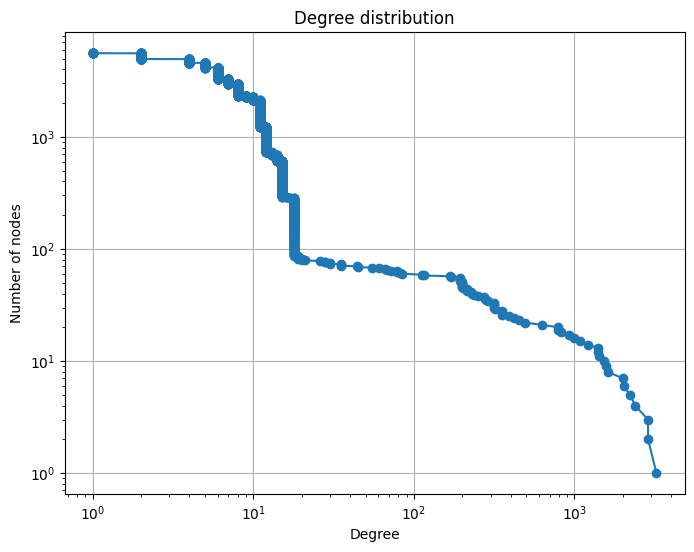

In [6]:
# Plot the power law of the number of nodes vs degree distribution in log-log scale
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
cumulative_sum = np.cumsum(degree_series)

plt.plot(degree_series, range(1, len(degree_series) + 1), marker="o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree distribution")
plt.grid(True)
plt.show()



In [7]:
# Open Node properties DataFrame
node_properties_df = pd.read_csv('../data/processed/bipartite-network-nodes.csv')

node_properties_df.head()

# Add node attributes to the bipartite graph
node_type = node_properties_df.set_index("id")["type"].to_dict()

nx.set_node_attributes(bipartite_graph, node_type, "type")

# Create a projection of the bipartite graph onto the 'medication' type of nodes
medication_nodes = [n for n, d in bipartite_graph.nodes(data=True) if d['type'] == 'medication']
medication_graph = nx.bipartite.projected_graph(bipartite_graph, medication_nodes)

# Draw the medication projection graph
# import matplotlib.pyplot as plt
# options = {
#     "node_size": 50,
#     "node_color": "skyblue",
#     "edge_color": "gray",
#     "linewidths": 0.5,
#     "width": 0.5,
# }
# plt.figure(figsize=(10, 8))
# nx.draw(medication_graph, with_labels=False, **options)
# plt.title("Medication Projection Graph")
# plt.show()

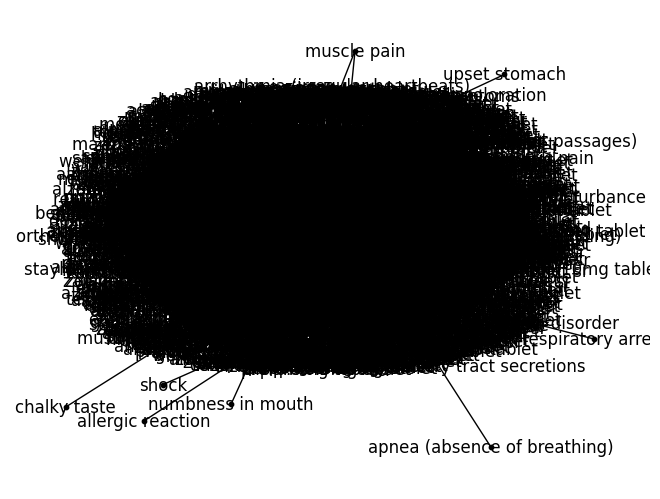

In [8]:
import matplotlib.pyplot as plt

options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 1,
}

plt.Figure(figsize=(6, 5))

connected_components = sorted(connected_components, key=len, reverse=True)

largest_cc = connected_components[0]
largest_cc = bipartite_graph.subgraph(largest_cc)

nx.draw(largest_cc, with_labels=True, **options)

In [9]:
# Advanced metrics

print(f"Average clustering coefficient: {nx.average_clustering(bipartite_graph)}")
print(f"Diameter of the largest connected component: {nx.diameter(bipartite_graph.subgraph(max(connected_components, key=len)))}")

# Betweenness centrality
betweenness = nx.betweenness_centrality(bipartite_graph)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality:")
for node, centrality in top_betweenness:    
    print(f"Node: {node}, Betweenness Centrality: {centrality:.4f}")


Average clustering coefficient: 0.0
Diameter of the largest connected component: 7
Top 5 nodes by betweenness centrality:
Node: drowsiness, Betweenness Centrality: 0.2603
Node: dizziness, Betweenness Centrality: 0.2323
Node: nausea, Betweenness Centrality: 0.1305
Node: vomiting, Betweenness Centrality: 0.0845
Node: memory impairment, Betweenness Centrality: 0.0687


In [10]:
import nx_parallel as nxp

# Create a parallel bipartite graph from the original bipartite graph
parallel_bipartite_graph = nxp.ParallelGraph(bipartite_graph)

# Advanced metrics using parallel processing

# Average clustering coefficient
avg_clustering_parallel = nx.average_clustering(parallel_bipartite_graph, backend="parallel")
print(f"Average clustering coefficient (parallel): {avg_clustering_parallel}")

# Diameter of the largest connected component
# largest_cc = max(nx.connected_components(parallel_bipartite_graph), key=len)
# diameter_parallel = nxp.diameter(parallel_bipartite_graph.subgraph(largest_cc))
# print(f"Diameter of the largest connected component (parallel): {diameter_parallel}")

# print(f"Diameter of the largest connected component: {nx.diameter(bipartite_graph.subgraph(max(connected_components, key=len)))}")

# Betweenness centrality
# betweenness_parallel = nxp.betweenness_centrality(parallel_bipartite_graph)
# top_betweenness_parallel = sorted(betweenness_parallel.items(), key=lambda x: x[1], reverse=True)[:5]
# print("Top 5 nodes by betweenness centrality (parallel):")
# for node, centrality in top_betweenness_parallel:       
#     print(f"Node: {node}, Betweenness Centrality: {centrality:.4f}")

ModuleNotFoundError: No module named 'nx_parallel'

In [ ]:
import nx_cugraph as nxcg

# Create a cuGraph bipartite graph from the original bipartite graph
gpu_bipartite_graph = nxcg.from_networkx(bipartite_graph)

# Betweenness centrality using GPU acceleration
# betweenness_gpu = nxcg.betweenness_centrality(gpu_bipartite_graph, normalized=True)
# top_betweenness_gpu = sorted(betweenness_gpu.items(), key=lambda x: x[1], reverse=True)[:5]
# print("Top 5 nodes by betweenness centrality (GPU):")
# for node, centrality in top_betweenness_gpu:
#     print(f"Node: {node}, Betweenness Centrality: {centrality:.4f}")

In [ ]:

import nx_parallel as nxp
# Create a parallel bipartite graph from the original bipartite graph
parallel_bipartite_graph = nxp.ParallelGraph(bipartite_graph)

# Jaccard coefficient using NetworkX
jaccard_coeffs = list(nx.jaccard_coefficient(bipartite_graph))
top_jaccard = sorted(jaccard_coeffs, key=lambda x: x[2], reverse=True)[:5]
print("Top 5 node pairs by Jaccard coefficient:")
for u, v, coeff in top_jaccard:
    print(f"Nodes: ({u}, {v}), Jaccard Coefficient: {coeff:.4f}")